In [1]:
import pandas as pd
import numpy as np

In [45]:
loans = pd.DataFrame.from_csv('lending-club-data.csv')

d:\Users\zeyang\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2825: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [46]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x: 1 if x ==0 else -1)
del loans['bad_loans']

In [47]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [48]:
loans = loans[[target] + features].dropna().reset_index(drop=True)

In [49]:
loans = pd.get_dummies(loans)

In [50]:
train_idx = pd.read_json('module-8-assignment-1-train-idx.json')[0]
validation_idx = pd.read_json('module-8-assignment-1-validation-idx.json')[0]

In [53]:
train_data = loans.ix[train_idx].reset_index(drop=True)

In [54]:
validation_data = loans.ix[validation_idx].reset_index(drop=True)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
new_features = loans.columns.values.tolist()
new_features.remove('safe_loans')

In [58]:
classifier = GradientBoostingClassifier(max_depth=6, n_estimators=5)

In [68]:
classifier.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [69]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
4672,1,0.2,0,3,29.44,6.30496,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4673,1,0.6,1,1,12.19,13.49520,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
0,-1,0.4,0,3,13.97,2.96736,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-1,1.0,0,11,16.33,1.90524,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [71]:
classifier.predict(sample_validation_data[new_features].as_matrix())

array([ 1,  1, -1,  1], dtype=int64)

In [72]:
# Quiz question: What percentage of the predictions on sample_validation_data did 
# model_5 get correct?

# 75%

In [73]:
classifier.predict_proba(sample_validation_data[new_features].as_matrix())

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [74]:
# Quiz Question: Which loan has the highest probability of being classified as a safe loan?

# 4

In [75]:
classifier.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.66135286514433433

In [87]:
# False positive
predictions = classifier.predict(validation_data[new_features].as_matrix())
sum(predictions[predictions != validation_data[target].as_matrix()] == 1)

1653

In [88]:
# False negative
sum(predictions[predictions != validation_data[target].as_matrix()] == -1)

1491

In [89]:
# cost
1653 * 20000 + 1491 * 10000

47970000

In [95]:
validation_data['predictions'] = classifier.predict_proba(validation_data[new_features].as_matrix())[:,1]

In [128]:
validation_data.columns

Index(['safe_loans', 'sub_grade_num', 'short_emp', 'emp_length_num', 'dti',
       'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero',
       'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none',
       'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util',
       'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc',
       'funded_amnt', 'funded_amnt_inv', 'installment', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'predictions'],
      dtype='object')

In [133]:
validation_data.sort_values('predictions', ascending=False)[:5]['grade_A']

278     1
4936    1
5705    1
7741    1
5305    1
Name: grade_A, dtype: float64

In [100]:
validation_data.sort_values('predictions')[:5]

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
2028,-1,0.8,0,2,8.66,17.62510,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.307334
3217,-1,0.8,1,1,7.37,16.62070,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.307334
876,-1,1.0,0,3,8.53,14.62800,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0.312806
4085,-1,0.2,0,11,11.21,4.23624,0,1,3,1,...,0,0,1,0,0,0,0,0,0,0.315973
4408,-1,0.4,0,3,21.90,7.18760,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0.315973


In [101]:
model_10 = GradientBoostingClassifier(max_depth=6, n_estimators=10)
model_50 = GradientBoostingClassifier(max_depth=6, n_estimators=50)
model_100 = GradientBoostingClassifier(max_depth=6, n_estimators=100)
model_200 = GradientBoostingClassifier(max_depth=6, n_estimators=200)
model_500 = GradientBoostingClassifier(max_depth=6, n_estimators=500)

In [103]:
model_10.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())
model_50.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())
model_100.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())
model_200.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())
model_500.fit(train_data[new_features].as_matrix(), train_data[target].as_matrix())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [104]:
model_10.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.66544592847910389

In [105]:
model_50.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.68160275743214127

In [106]:
model_100.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.68925032313657908

In [107]:
model_200.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.68644980611805262

In [108]:
model_500.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix())

0.68914261094355878

In [114]:
# Quiz Question: Which model has the best accuracy on the validation_data?

# model_100

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [116]:
models = [model_10, model_50, model_100, model_200, model_500]

In [119]:
train_errors = [1 - model.score(train_data[new_features].as_matrix(), train_data[target].as_matrix()) for model in models]

In [121]:
validation_errors = [1 - model.score(validation_data[new_features].as_matrix(), validation_data[target].as_matrix()) for model in models]

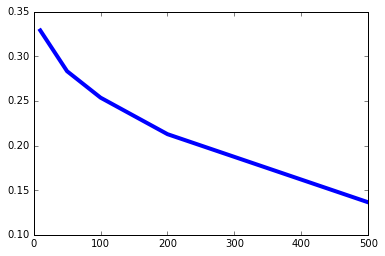

In [123]:
plt.plot([10, 50, 100, 200, 500], train_errors, linewidth=4.0, label='Training error')

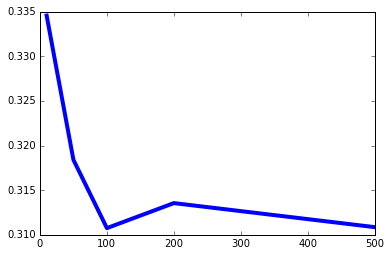

In [124]:
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

d:\Users\zeyang\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


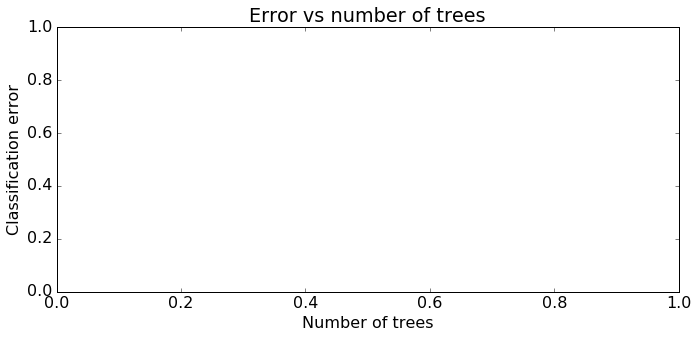

In [125]:
make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

In [126]:
# Quiz question: Does the training error reduce as the number of trees increases?
# Yes

In [127]:
# Quiz question: Is it always true that the validation error will reduce as the number 
# of trees increases?

# No